In [1]:
import numpy as np
import tensorflow as tf

In [2]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

negative_samples.shape, positive_samples.shape

((1000, 2), (1000, 2))

In [3]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

In [4]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

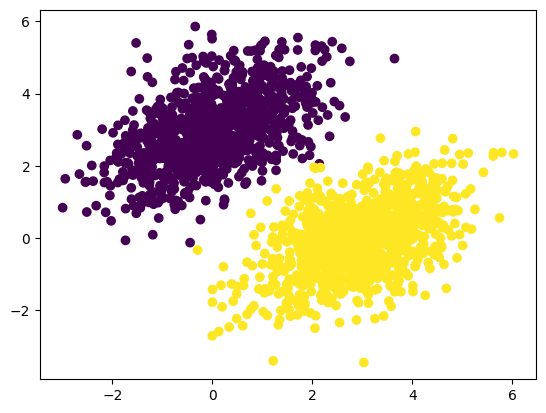

In [5]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0]) # x, y, color
plt.show()

In [6]:
input_dim = 2
output_dim = 1
W  = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [7]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [8]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses) # single scalar loss value with mean

In [9]:
learning_rate = 1e-1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [10]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.3311
Loss at step 1: 0.3376
Loss at step 2: 0.1478
Loss at step 3: 0.1173
Loss at step 4: 0.1067
Loss at step 5: 0.0991
Loss at step 6: 0.0924
Loss at step 7: 0.0863
Loss at step 8: 0.0808
Loss at step 9: 0.0758
Loss at step 10: 0.0713
Loss at step 11: 0.0671
Loss at step 12: 0.0633
Loss at step 13: 0.0599
Loss at step 14: 0.0568
Loss at step 15: 0.0539
Loss at step 16: 0.0513
Loss at step 17: 0.0490
Loss at step 18: 0.0468
Loss at step 19: 0.0449
Loss at step 20: 0.0431
Loss at step 21: 0.0415
Loss at step 22: 0.0400
Loss at step 23: 0.0386
Loss at step 24: 0.0374
Loss at step 25: 0.0363
Loss at step 26: 0.0353
Loss at step 27: 0.0344
Loss at step 28: 0.0335
Loss at step 29: 0.0328
Loss at step 30: 0.0321
Loss at step 31: 0.0314
Loss at step 32: 0.0309
Loss at step 33: 0.0303
Loss at step 34: 0.0299
Loss at step 35: 0.0294
Loss at step 36: 0.0290
Loss at step 37: 0.0287
Loss at step 38: 0.0283
Loss at step 39: 0.0281


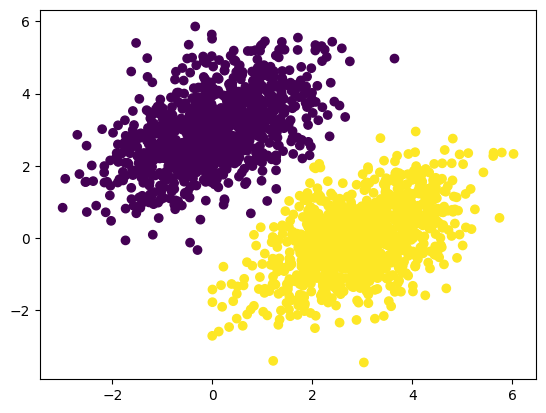

In [11]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

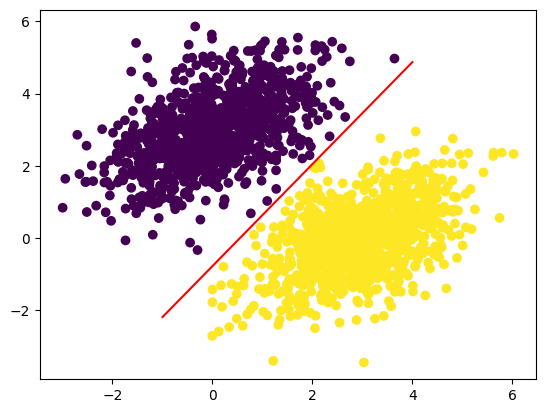

In [12]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)